### Joris

In [2]:
import pandas as pd
import matplotlib.pyplot as plt	
import seaborn as sns
import os
import glob

In [4]:
accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_joris\Accelerometer.csv")
barometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_joris\Barometer.csv")
gyroscope_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_joris\Gyroscope.csv")
linear_accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_joris\Linear Accelerometer.csv")
location_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_joris\Location.csv")
magnetometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_joris\Magnetometer.csv")
proximity_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_joris\Proximity.csv")

In [9]:
def plot_sensor_data(sensor_data_dict, time_col="Time (s)"):
    fig, axs = plt.subplots(len(sensor_data_dict), 1, figsize=(15, 20), sharex=True)

    if len(sensor_data_dict) == 1:
        axs = [axs]

    for ax, (label, df) in zip(axs, sensor_data_dict.items()):
        if time_col not in df.columns:
            continue
        df = df.dropna()  # Verwijder lege rijen

        time = df[time_col]
        for col in df.columns:
            if col == time_col:
                continue
            ax.plot(time, df[col], label=col)

        ax.set_title(label)
        ax.legend(loc='upper right')
        ax.grid(False)  # Verwijder gridlines

    axs[-1].set_xlabel('Time (s)')
    plt.tight_layout()
    plt.show()


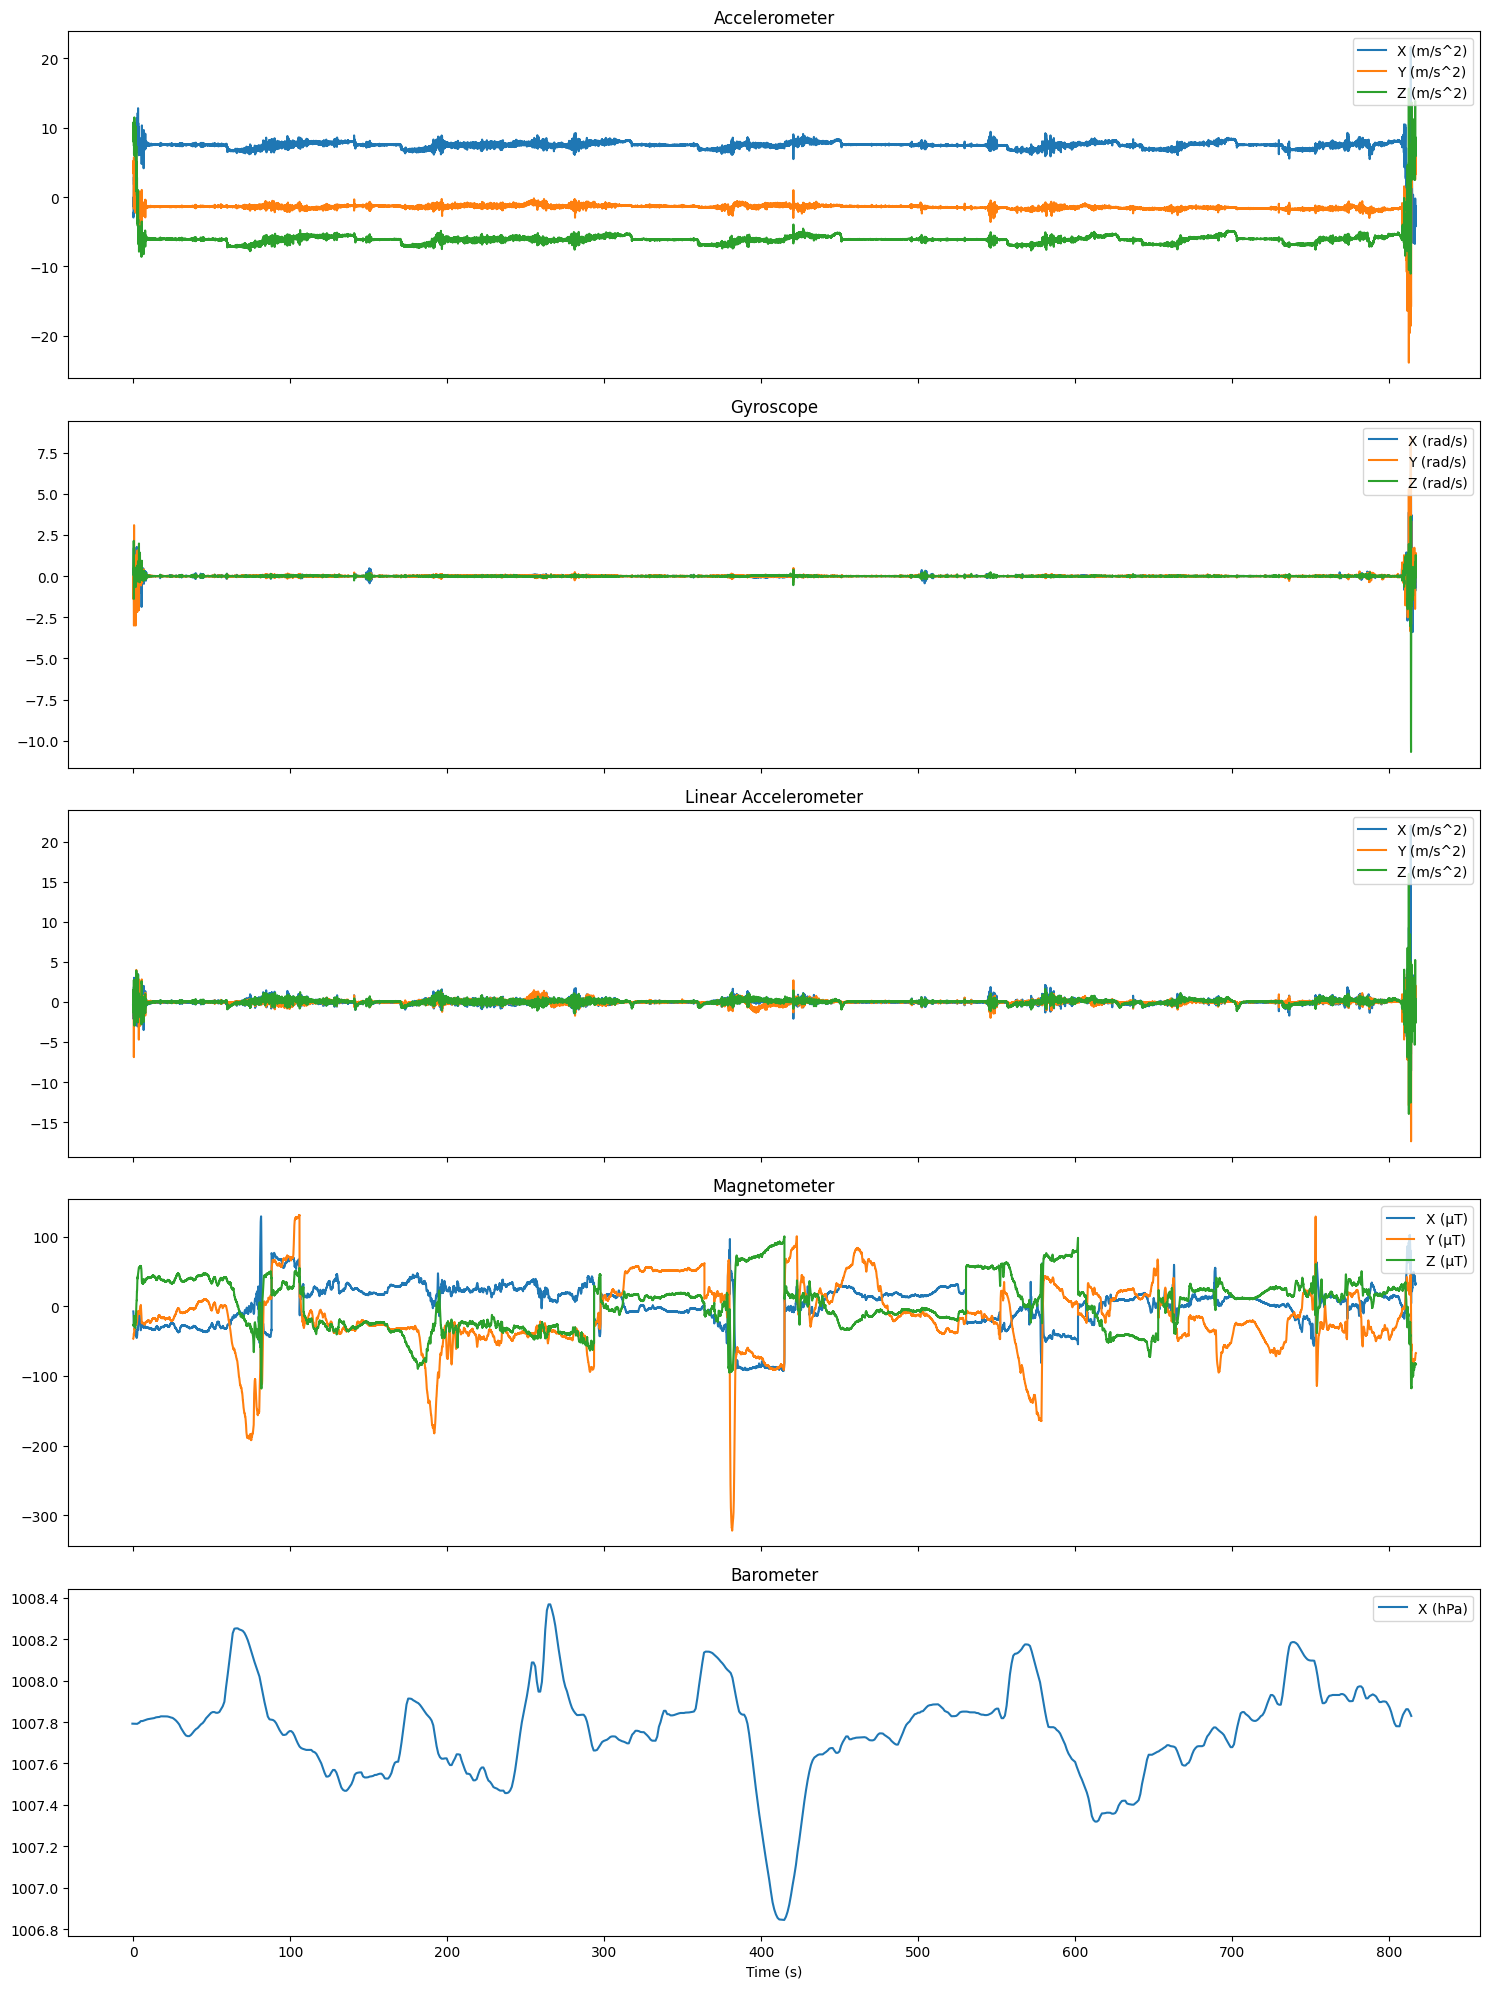

In [10]:
sensor_data_dict = {
    "Accelerometer": accelerometer_df,
    "Gyroscope": gyroscope_df,
    "Linear Accelerometer": linear_accelerometer_df,
    "Magnetometer": magnetometer_df,
    "Barometer": barometer_df,
    # Voeg hier eventueel meer toe zoals hartslag, licht, labels etc.
}

plot_sensor_data(sensor_data_dict)


In [11]:
auto_accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris\Accelerometer.csv")
auto_barometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris\Barometer.csv")
auto_gyroscope_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris\Gyroscope.csv")
auto_linear_accelerometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris\Linear Accelerometer.csv")
auto_location_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris\Location.csv")
auto_magnetometer_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris\Magnetometer.csv")
auto_proximity_df = pd.read_csv(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_auto_joris\Proximity.csv")

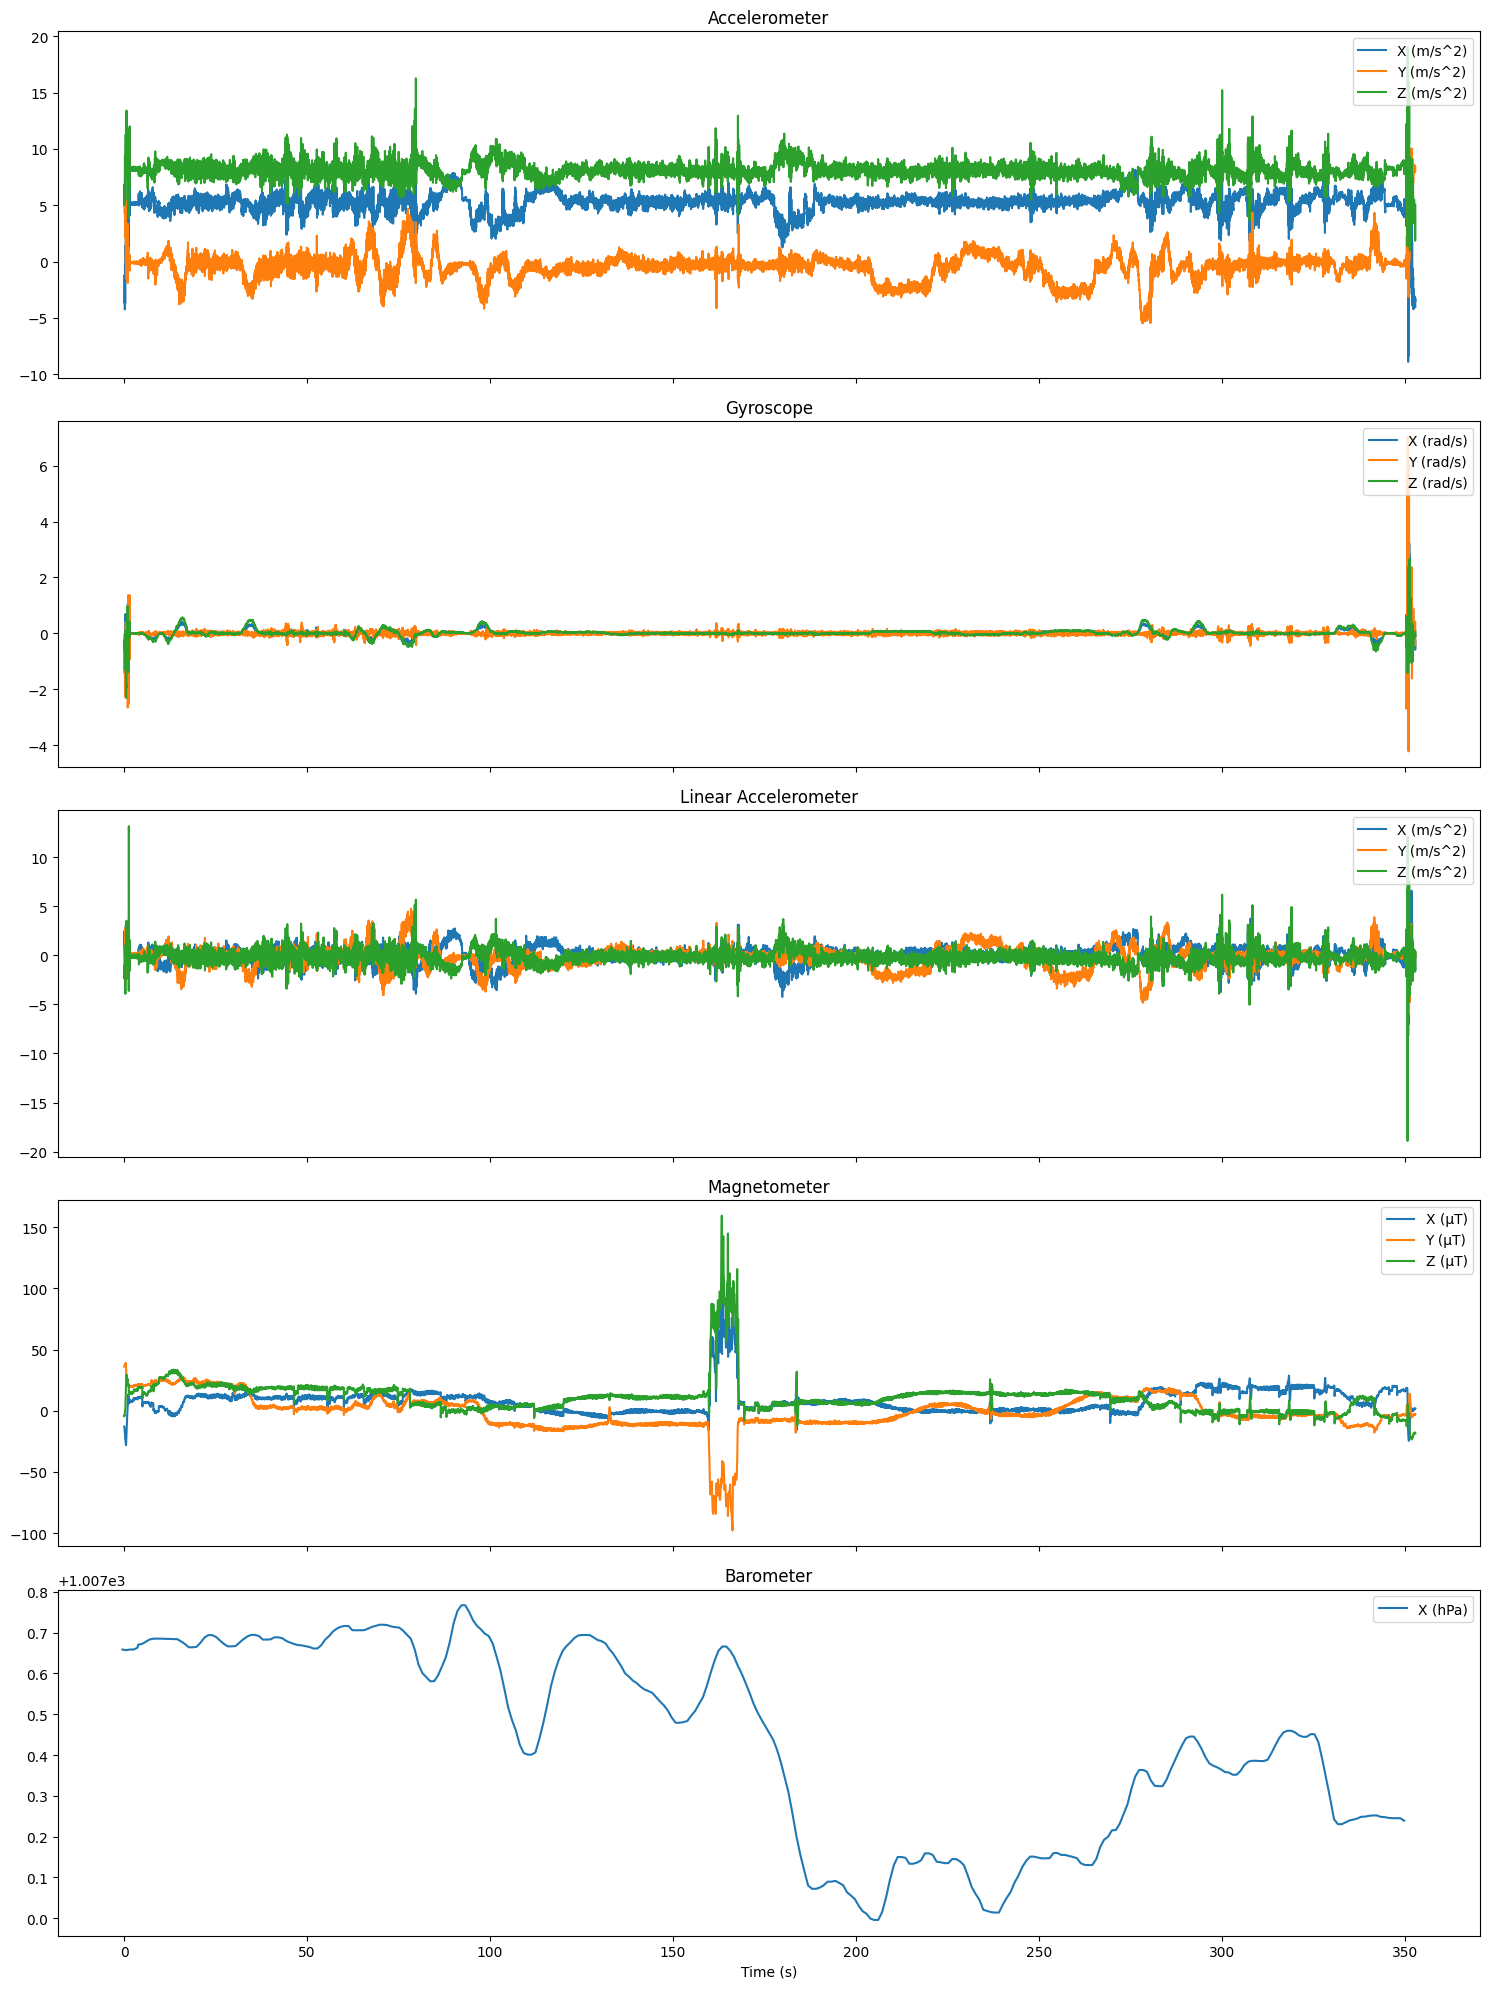

In [12]:
sensor_data_dict_auto = {
    "Accelerometer": auto_accelerometer_df,
    "Gyroscope": auto_gyroscope_df,
    "Linear Accelerometer": auto_linear_accelerometer_df,
    "Magnetometer": auto_magnetometer_df,
    "Barometer": auto_barometer_df,
    # Voeg hier eventueel meer toe zoals hartslag, licht, labels etc.
}

plot_sensor_data(sensor_data_dict_auto)

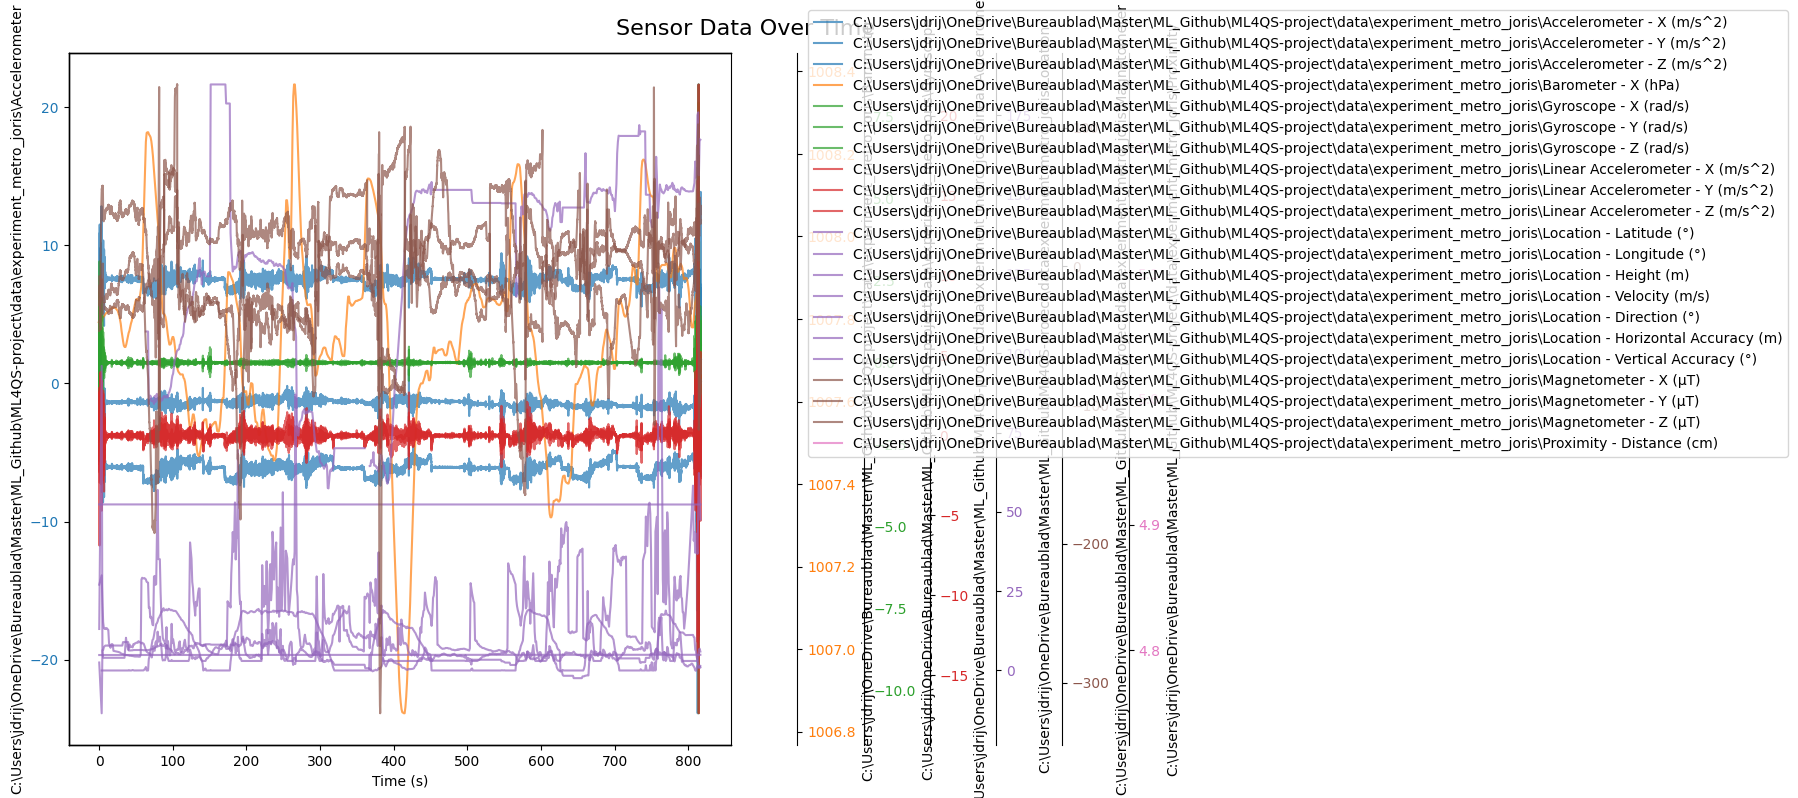

In [3]:
# Load all CSV files in the current directory
csv_files = glob.glob(r"C:\Users\jdrij\OneDrive\Bureaublad\Master\ML_Github\ML4QS-project\data\experiment_metro_joris\*.csv")

# Dictionary to hold all dataframes
dfs = {}

# Load each CSV into a DataFrame
for file in csv_files:
    name = os.path.splitext(file)[0]
    df = pd.read_csv(file)
    df = df.sort_values(by=df.columns[0])  # Ensure sorted by time
    df.rename(columns={df.columns[0]: 'Time'}, inplace=True)  # Standardize time column
    dfs[name] = df

# Plotting
fig, ax1 = plt.subplots(figsize=(15, 8))
colors = plt.cm.tab10.colors  # Up to 10 colors

# Create multiple y-axes
axes = [ax1]
for i in range(1, len(dfs)):
    axes.append(ax1.twinx())
    axes[-1].spines["right"].set_position(("axes", 1 + 0.1 * i))  # Offset for visibility

# Plot each dataframe
for i, (name, df) in enumerate(dfs.items()):
    ax = axes[i]
    features = df.columns.drop('Time')
    
    for feature in features:
        ax.plot(df['Time'], df[feature], label=f"{name} - {feature}", alpha=0.7, color=colors[i % len(colors)])
    
    ax.set_ylabel(name)
    ax.tick_params(axis='y', labelcolor=colors[i % len(colors)])

# Final plot settings
ax1.set_xlabel("Time (s)")
fig.suptitle("Sensor Data Over Time", fontsize=16)
fig.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()